In [2]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Analysis of clusters in sample S3

In [3]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

## Preprocessing
### Read data

In [32]:
data_path = "../../data/BacDrop"
data_gene = sc.read_h5ad(data_path + "/antibiotics_data_processed_2.h5ad")


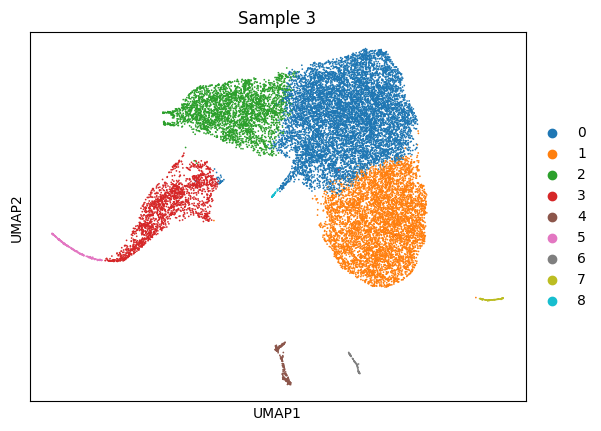

In [33]:
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [34]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 200
Both NB and ZINB not converged! Using NB without starting params


In [35]:
data_gene.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,means,variances,variances_norm,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-AF52_RS00165,13,0.000662,0.000662,99.933802,13.0,2.639057,13,0.000661,False,0.019373,...,0.000662,0.000662,0.950712,0.000662,0.000662,4.382200e-07,poi,0.003782,inf,0.823487
cds-AF52_RS00180,2,0.000102,0.000102,99.989816,2.0,1.098612,2,0.000102,False,0.000192,...,0.000102,0.000102,1.001273,0.000102,0.000102,1.037207e-08,poi,0.001016,inf,0.896044
cds-AF52_RS00620,14,0.000713,0.000713,99.928710,14.0,2.708050,14,0.000713,False,0.020337,...,0.000713,0.000712,0.948014,0.000713,0.000712,5.082315e-07,poi,0.003985,inf,0.819913
cds-AF52_RS01010,2,0.000102,0.000102,99.989816,2.0,1.098612,2,0.000102,False,0.000192,...,0.000102,0.000102,1.001273,0.000102,0.000102,1.037207e-08,poi,0.001016,inf,0.896044
cds-AF52_RS01075,3,0.000153,0.000153,99.984723,3.0,1.386294,3,0.000153,False,0.000266,...,0.000153,0.000153,0.963435,0.000153,0.000153,2.333716e-08,poi,0.001328,inf,0.883814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-WP_187079188.1,9,0.000458,0.000458,99.954170,9.0,2.302585,9,0.000458,False,0.022134,...,0.000458,0.000458,0.944642,0.000458,0.000458,2.100344e-07,poi,0.002890,inf,0.841051
cds-WP_187079189.1,24,0.001273,0.001272,99.877788,25.0,3.258096,24,0.001373,False,0.019629,...,0.001273,0.001373,1.008768,0.001273,0.001373,-1.002227e-04,nb,0.001271,0.040514,0.000000
cds-WP_187079194.1,39,0.002037,0.002035,99.801405,40.0,3.713572,39,0.002134,False,0.028122,...,0.002037,0.002135,0.986250,0.002037,0.002135,-9.769454e-05,nb,0.002036,0.025546,0.000000
cds-WP_187079196.1,21,0.001171,0.001171,99.893064,23.0,3.178054,21,0.001374,False,0.014256,...,0.001171,0.001374,1.096998,0.001171,0.001374,-2.023150e-04,nb,0.001171,0.082330,0.000000


## Find optimal correlation matrix scaling and generate synthetic null data

In [36]:
importlib.reload(cd)
xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
print(xmin)

Factor: 1 - Error: 12.324500448347539
Factor: 2 - Error: 12.284149541339806
Factor: 3.6180339999999998 - Error: 12.393619897618374
Factor: 2 - Error: 12.284149541339806
Factor: 2.61803399102434 - Error: 12.398392414416005
Factor: 1.61803399 - Error: 12.360752551323388
Factor: 2.236067977595943 - Error: 12.387760862299489
Factor: 1.85410196720468 - Error: 12.321748586162876
Factor: 2.090169943491092 - Error: 12.346382972502715
Factor: 1.9442719105463224 - Error: 12.411313738567094
Factor: 2.034441853537218 - Error: 12.329130614832836
Factor: 1.9787137640264558 - Error: 12.304738366362242
Factor: 2.0131556173726155 - Error: 12.44241223416941
Factor: 1.991869381377267 - Error: 12.356783550890144
Factor: 2.0050249986769044 - Error: 12.36275869102783
Factor: 1.996894380045843 - Error: 12.301062749661117
Factor: 2.0019193786948724 - Error: 12.343447870071369
Factor: 1.9988137587375343 - Error: 12.334508140902422
Factor: 2.0007331374217596 - Error: 12.299774073601414
Factor: 1.999546896158078

In [37]:
importlib.reload(cd)

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [38]:
importlib.reload(cd)
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True,
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)

In [39]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [40]:
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

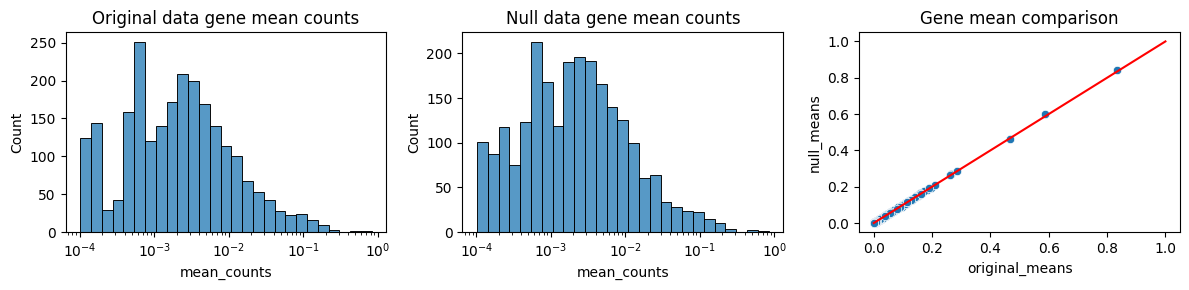

SignificanceResult(statistic=0.9893589609513856, pvalue=0.0)


In [41]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

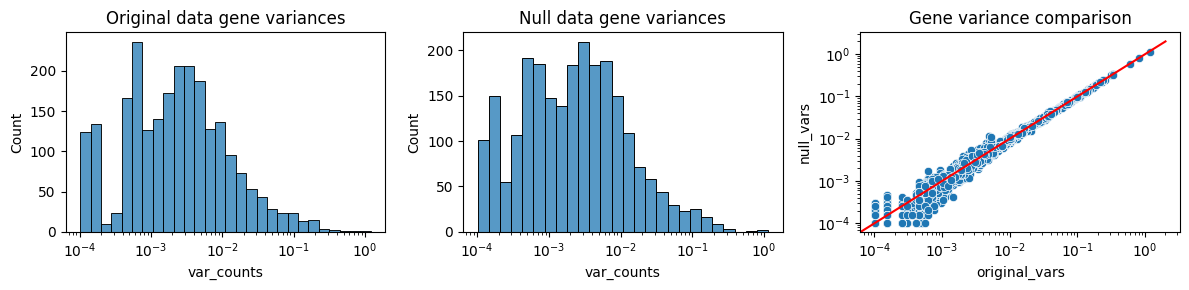

SignificanceResult(statistic=0.9858285959946576, pvalue=0.0)
[[1.         0.99932398]
 [0.99932398 1.        ]]


In [42]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

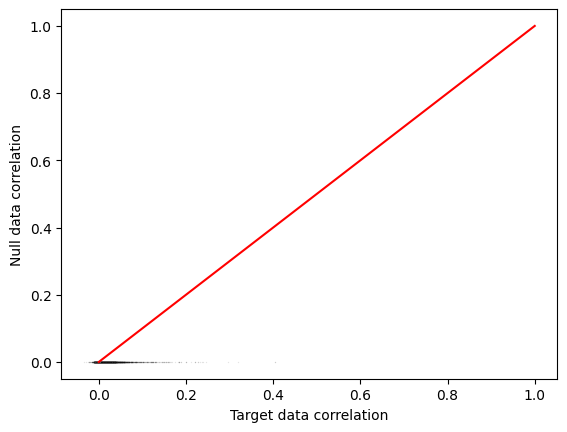

In [43]:
cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_shrink'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1,
                color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_shrink']))], [0, np.ceil(np.max(all_cors_subset['cor_shrink']))],
         color="red")
plt.xlabel("Target data correlation")
plt.ylabel("Null data correlation")

plt.show()

### Process null data

In [44]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [45]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform")
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = data_gene.uns["BacSC_params"]["k_opt"]
n_neighbors_opt = data_gene.uns["BacSC_params"]["n_neighbors_opt"]
min_dist_opt = data_gene.uns["BacSC_params"]["min_dist_opt"]
res_opt = data_gene.uns["BacSC_params"]["res_opt"]
print(n_neighbors_opt)

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


30


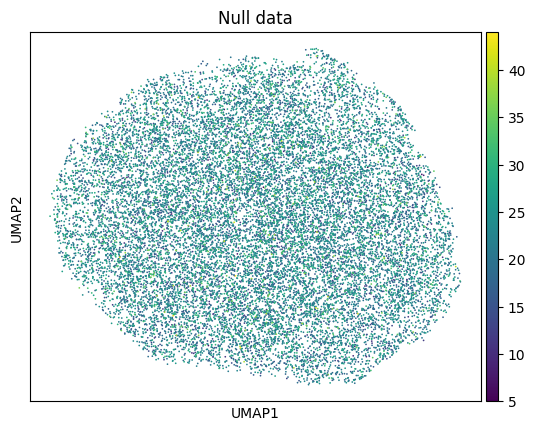

In [46]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [47]:
data_null_gen.write(data_path + "/null_data_antibiotics_2.h5ad")

In [50]:
res2 = 0.01
twoclust = False
#345 vs. 456

while twoclust is False:
    if (res2 * 100)%5 == 0:
        print(res2)
    res2 += 0.01
    res2 = np.round(res2, 3)
    sc.tl.leiden(data_null_gen, resolution=res2, key_added="leiden", random_state=234)
    nclust = len(data_null_gen.obs["leiden"].unique())
    if nclust == 2:
        twoclust = True
    
    
print(f"Resolution for two clusters: {res2}")

0.05
0.1
0.15
Resolution for two clusters: 0.18


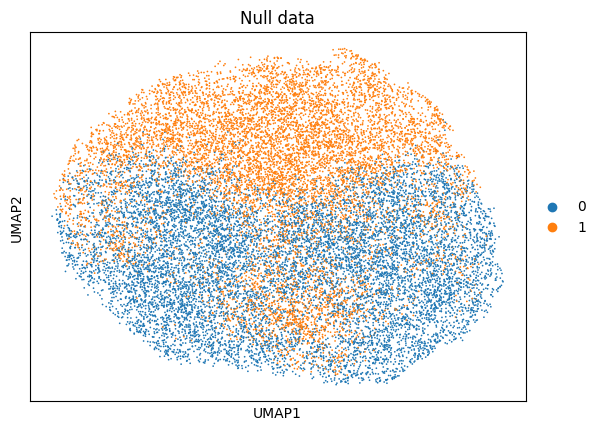

In [51]:
# sc.tl.leiden(data_null_gen, resolution=0.1, key_added="leiden", random_state=234)
sc.pl.umap(data_null_gen, color="leiden", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [52]:
data_null_gen.write("../../data/MOBA_scRNAseq/outs_S3/S3_null_data_opt.h5ad")


In [53]:
X_null_gen_0 = data_null_gen.X[data_null_gen.obs["leiden"] == "0"]
X_null_gen_1 = data_null_gen.X[data_null_gen.obs["leiden"] != "0"]

pval_null_gen = pd.DataFrame({"pval_null": ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue}, index=data_null_gen.var.index)

clusters = data_gene.obs["leiden_opt"].unique()

In [54]:
importlib.reload(cd)
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 3 - DE genes: 25; Minimum q value: 0.04
Cluster 2 - DE genes: 0; Minimum q value: 0.09523809523809523
Cluster 1 - DE genes: 0; Minimum q value: 0.05555555555555555
Cluster 0 - DE genes: 0; Minimum q value: 0.058823529411764705
Cluster 5 - DE genes: 0; Minimum q value: 0.125
Cluster 4 - DE genes: 0; Minimum q value: 0.2
Cluster 8 - DE genes: 0; Minimum q value: 0.23529411764705882
Cluster 6 - DE genes: 0; Minimum q value: 0.13333333333333333
Cluster 7 - DE genes: 0; Minimum q value: 0.125


In [55]:
DEs_gen = {}
pvals_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=False)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_gen[c] = DE_TU
    pvals_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_gen[c])}; Minimum q value: {np.min(pvals_gen[c]['q'])}")

Cluster 3 - DE genes: 0; Minimum q value: 0.06666666666666667
Cluster 2 - DE genes: 0; Minimum q value: 0.21428571428571427
Cluster 1 - DE genes: 0; Minimum q value: 0.16666666666666666
Cluster 0 - DE genes: 0; Minimum q value: 0.21372031662269128
Cluster 5 - DE genes: 0; Minimum q value: 1.0
Cluster 4 - DE genes: 0; Minimum q value: 0.5
Cluster 8 - DE genes: 0; Minimum q value: 0.5555555555555556
Cluster 6 - DE genes: 0; Minimum q value: 0.14285714285714285
Cluster 7 - DE genes: 0; Minimum q value: 0.06666666666666667


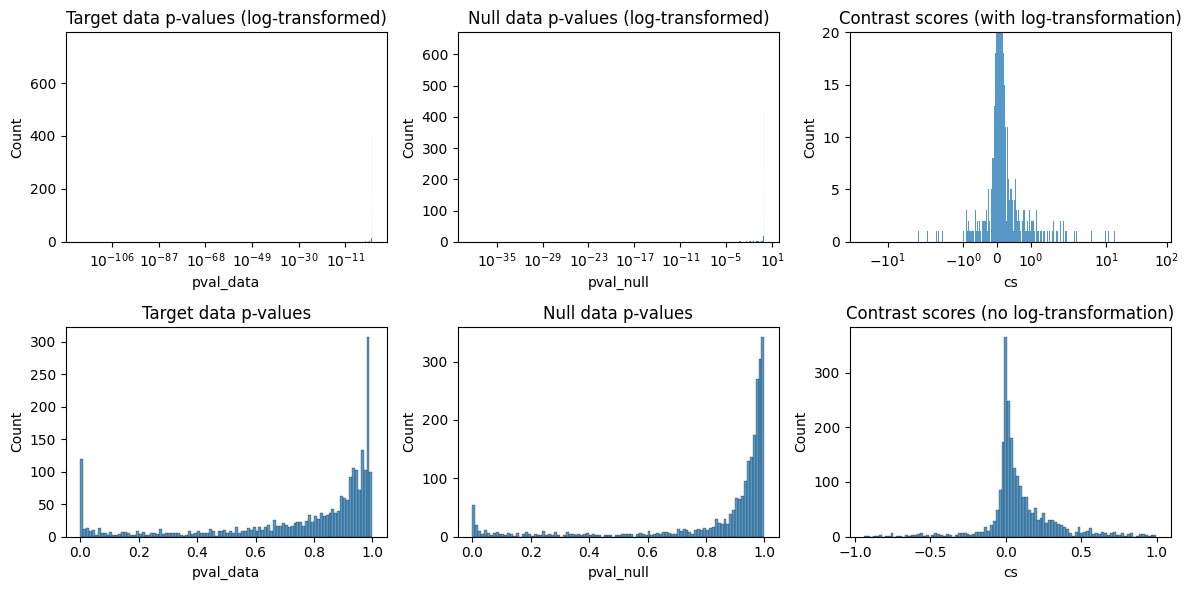

In [56]:
c = "1"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog",
            ylim=(0, 20)
            )

sns.histplot(pvals_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (no log-transformation)")


plt.tight_layout()
plt.show()

In [57]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 3
0.040000     25
0.075000     15
0.166667      2
0.186047      1
0.212766      4
           ... 
0.646436      9
0.653305      5
0.656601      2
0.656924     13
1.000000    943
Name: q, Length: 123, dtype: int64

cluster 2
0.095238     42
0.127660      5
0.145833      1
0.152542     11
0.158730      4
           ... 
0.434565      1
0.435404     13
0.435534     11
0.440267     28
1.000000    731
Name: q, Length: 143, dtype: int64

cluster 1
0.055556     36
0.063830     11
0.074074      7
0.118644      5
0.123077      6
           ... 
0.389549      3
0.389911      1
0.391820      2
0.393365      1
1.000000    692
Name: q, Length: 167, dtype: int64

cluster 0
0.058824     17
0.095238      4
0.125000      3
0.148148      3
0.200000      8
           ... 
0.404242      1
0.408843      1
0.410042     22
0.414141     10
1.000000    697
Name: q, Length: 165, dtype: int64

cluster 5
0.125       8
1.000    2372
Name: q, dtype: int64

cluster 4
0.2       5
1.0    2375
Name: q, dtype: i

In [ ]:
pvals_log_gen[("3")]